# 42577 Airbnb analysis project

Jaime Guzman - S222025

## Section 1 - Introduction

For this project the following libraries will be used. To avoid the need to look for them **all** the libraries that are used in this project will be find here.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Section 1.1 - Data Loading & Cleaning
The first thing that will be done is to load the data into a pandas dataframe and inspect the data for any anomaly that might require cleansing.

In [19]:
data = pd.read_csv('listings_CPH.csv')
print(data.shape)
data.head()

(13815, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,2022-06-21,1.08,1,0,4,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,2022-08-09,0.55,1,303,8,NaN
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,NaN,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2022-09-10,2.06,3,56,7,NaN
3,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,2022-08-04,0.16,1,59,2,NaN
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022-08-22,0.13,1,0,2,NaN


We can see that the data was loaded correctly, now it is necessary to check if the data has any abnormality and also to inspect the data type of each column to verify it's correct.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13815 non-null  int64  
 1   name                            13815 non-null  object 
 2   host_id                         13815 non-null  int64  
 3   host_name                       13814 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13815 non-null  object 
 6   latitude                        13815 non-null  float64
 7   longitude                       13815 non-null  float64
 8   room_type                       13815 non-null  object 
 9   price                           13815 non-null  int64  
 10  minimum_nights                  13815 non-null  int64  
 11  number_of_reviews               13815 non-null  int64  
 12  last_review                     

It seems that the data on the columns neighbourhood_group and license is not showing, it is a good idea to check for all unique values in these columns to verify that the data is all null. In case it is, then we can just delete the columns.

In [21]:
print(f'neighbourhood_group: {data.neighbourhood_group.unique()}')
print(f'license: {data.license.unique()}')

neighbourhood_group: [nan]
license: [nan]


Since our data is only null values we will delete it form our dataframe for now.

In [22]:
data.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,2022-06-21,1.08,1,0,4
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,2022-08-09,0.55,1,303,8
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2022-09-10,2.06,3,56,7
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,2022-08-04,0.16,1,59,2
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022-08-22,0.13,1,0,2


Now we check for different statistical values that might help us discover outliers in our data.

In [23]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.381500e+04,1.381500e+04,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,12170.000000,13815.000000,13815.000000,13815.000000
mean,1.719385e+17,1.064145e+08,55.680569,12.557805,1205.878972,4.605574,18.571118,0.903816,4.400651,93.302642,5.451104
std,2.852538e+17,1.302801e+08,0.021088,0.033512,1433.143149,16.900153,36.402671,1.110754,21.298565,123.161958,11.373977
min,6.983000e+03,1.171800e+04,55.609510,12.435670,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.907962e+07,1.356383e+07,55.666110,12.540285,729.000000,2.000000,2.000000,0.230000,1.000000,0.000000,0.000000
50%,3.931542e+07,4.656301e+07,55.681190,12.555520,995.000000,3.000000,7.000000,0.530000,1.000000,20.000000,3.000000
75%,5.665348e+17,1.553486e+08,55.695770,12.580741,1368.500000,4.000000,20.000000,1.120000,1.000000,174.000000,6.000000
max,7.222925e+17,4.805803e+08,55.742800,12.651740,64900.000000,1111.000000,711.000000,24.020000,179.000000,365.000000,471.000000


We can see some interesting data from here. For example, the lowest price listed is 0, which doesn't make any sense. It would do good to look into this further to find information.

In [24]:
data.reviews_per_month = data.reviews_per_month.fillna(0)
data.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1645
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

## Section 1.2 - Data Exploration

Here we are going dive further into the data. As we saw before, our price variable seems to have some issues, so we will start with that, but we will do the same analysis to all of our variables.

<AxesSubplot:xlabel='price', ylabel='Count'>

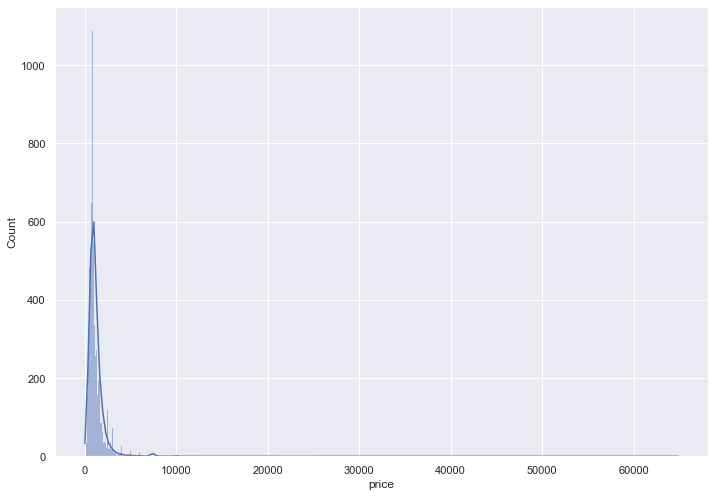

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=data, x='price', kde=True)

The situation with the price variable is surprising. We can see taht the mayority of pricings are at or near 0. It was expected to have some high priced rental locations, but the disparity between the lowest and highest priced rental is a little bit much. We shall now dive further into this analysis.

In [26]:
data.price.value_counts()

1000    656
1200    563
800     506
900     439
1500    425
       ... 
4400      1
198       1
3333      1
1787      1
347       1
Name: price, Length: 1689, dtype: int64

In [27]:
data[data['price'] == 0]['price'].count()

2

We find that the case of having alot of properties with value 0 is not the case, since most are priced in 1000. We will now do the same chart as above but only for the data that is less than 10000 to see the distribution of our data without the expensive outliers.

<AxesSubplot:xlabel='price', ylabel='Count'>

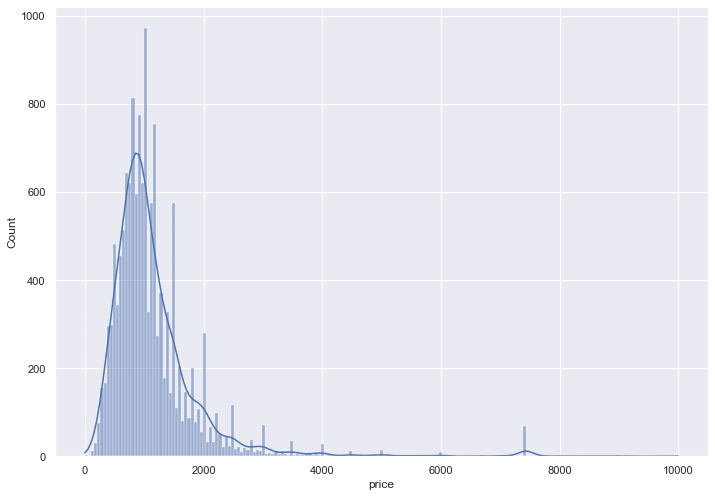

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataf = data[data['price'] < 10000]
sns.histplot(data=dataf, x='price', kde=True)

With the figure above we can now understand better the distribution of prices for the different airbnbs that are listes in Copenhagen. Now we want to find the outliers for all our variables, therefore we are going to implement a box plot for all our variables, which will help us see which variables have many outliers and which are distributed more normally. It is also important to remember that our price variable is set to local currency, therefore all values are in danish krones.

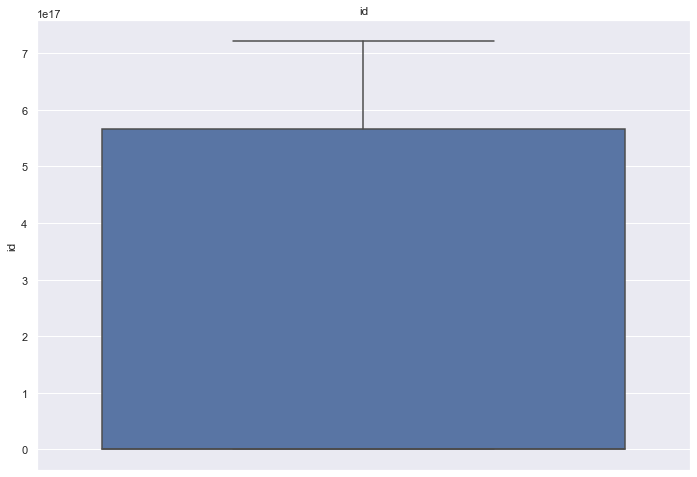

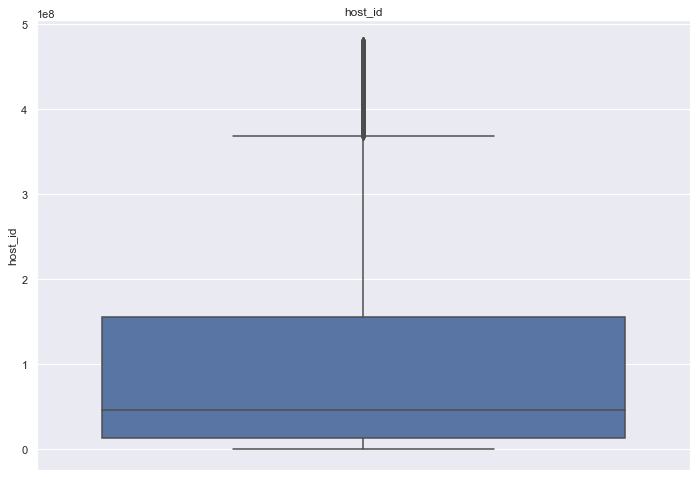

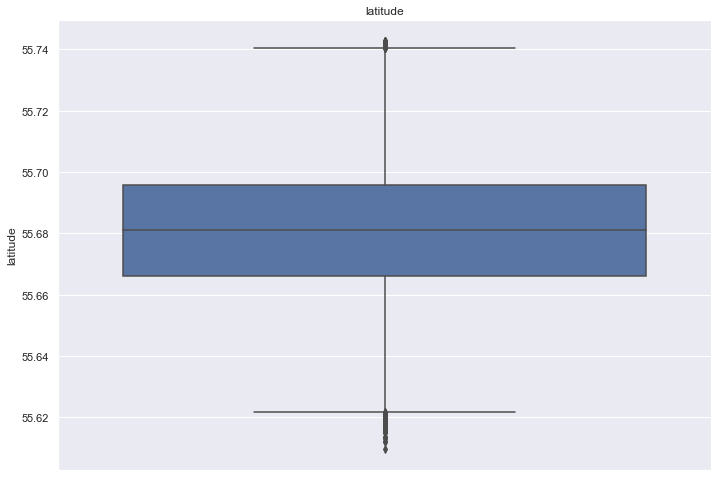

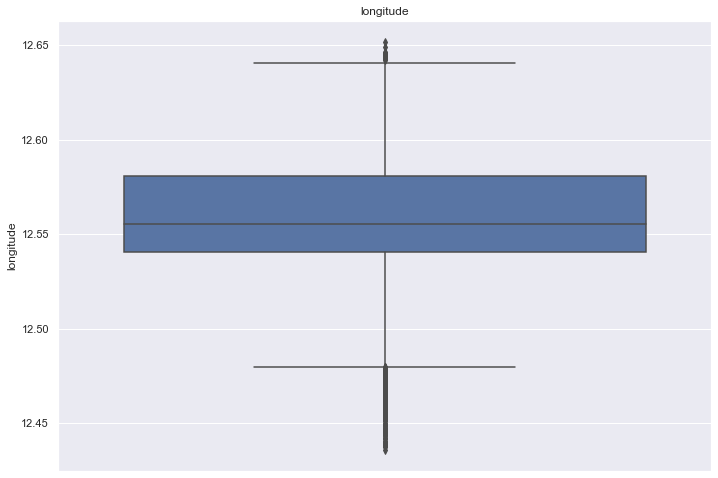

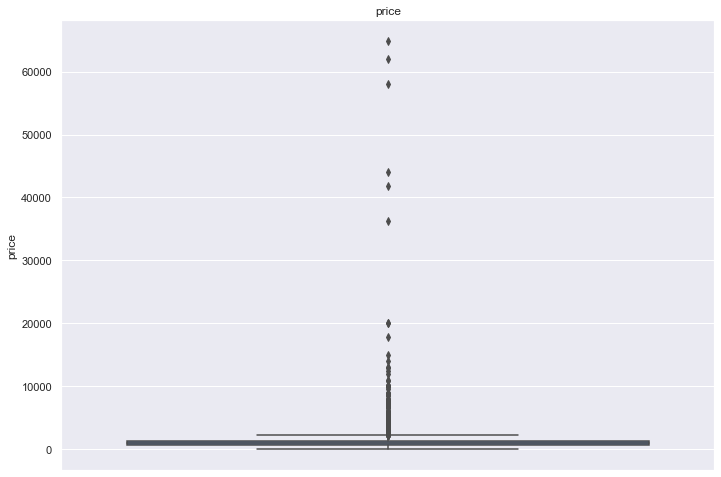

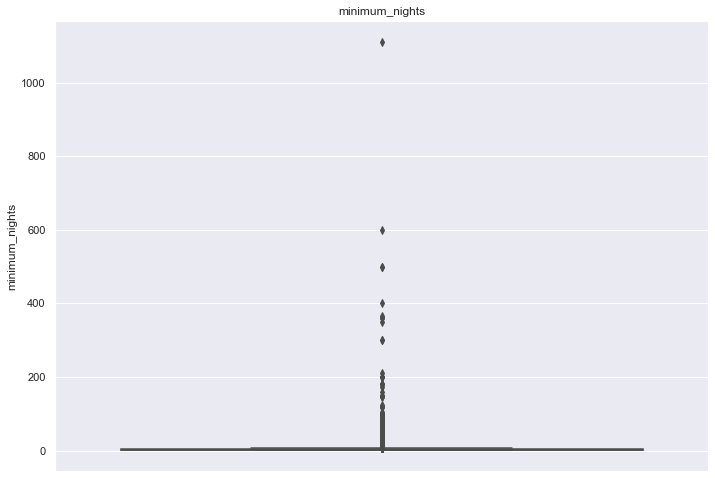

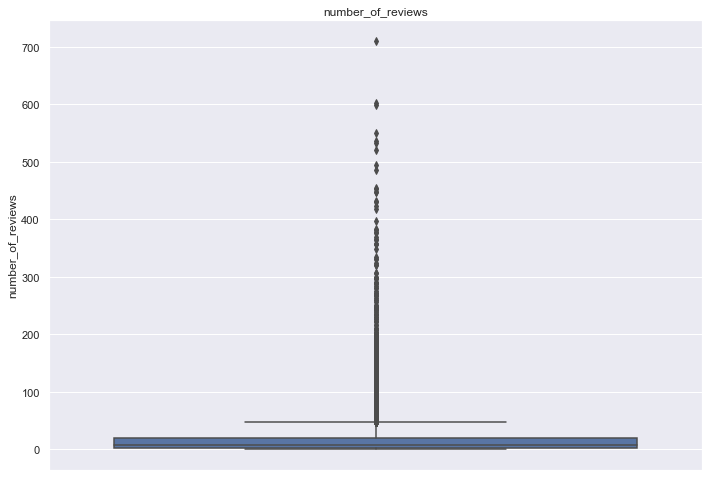

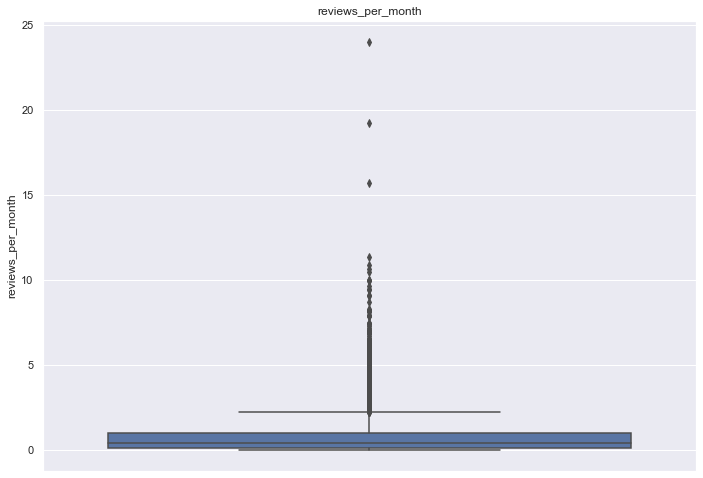

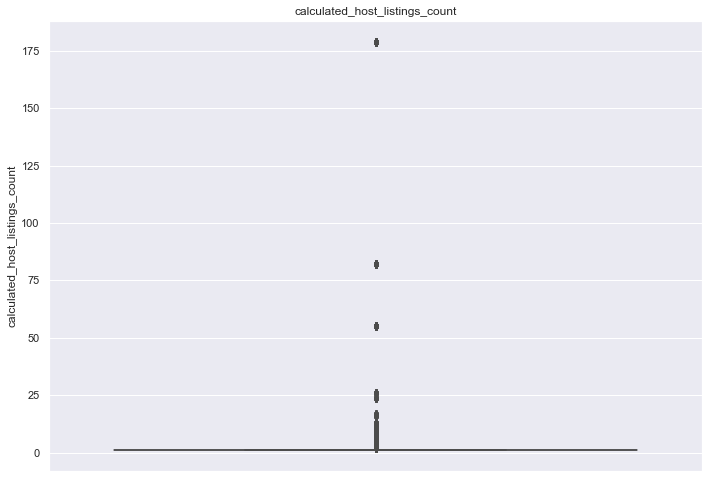

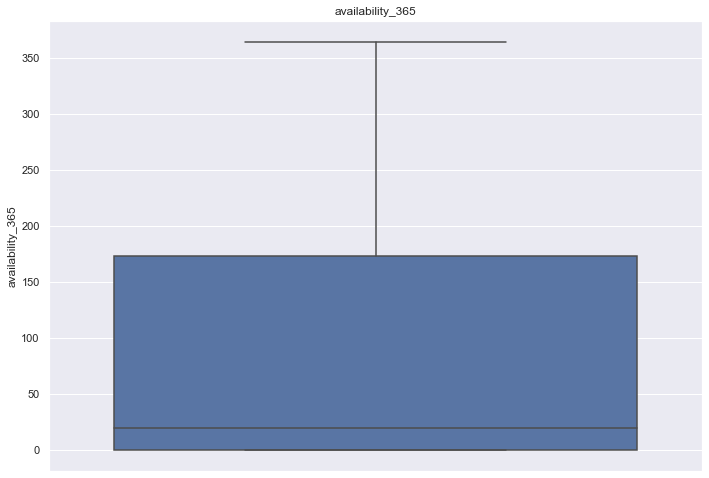

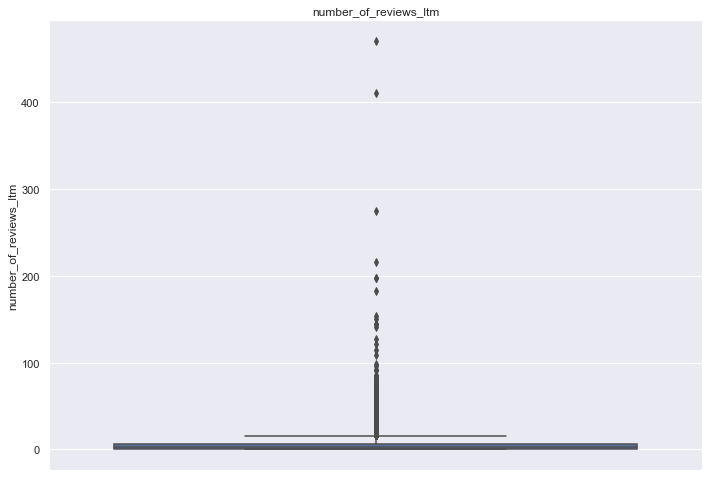

In [29]:
def plot_box(df, col):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.boxplot(data=df, y=col).set_title(col)
    plt.show()

for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        plot_box(data, col)

We can see some very interesting data in the plots above. The one that is most interesting is the minimum_nights variable, which is telling us there are some outliers that are asking for a minimum of 200 nights, with some asking for over 1000 nights. This are conditions that are not very common and invite many questions, such as what type of rental property is this or what are the asking prices when asking someone to live for almost a year (or 3 in the case of 1000+).

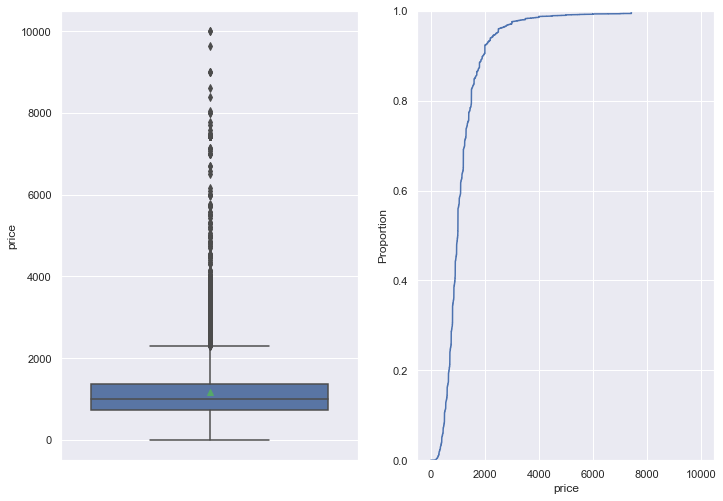

In [30]:
fig, ax = plt.subplots(1,2)
# sns.set(rc={'figure.figsize':(11.7,8.27)})
dataf = data[data['price'] < 10000]
sns.ecdfplot(data=dataf, x='price', ax=ax[1])
sns.boxplot(data=dataf, y="price", showmeans=True, ax=ax[0])
plt.show()

In [31]:
percentiles = [10, 33, 50, 66, 90]
for i in percentiles:
    print(f'{i}th percentile: {np.percentile(data.price, i)}')

10th percentile: 500.0
33th percentile: 800.0
50th percentile: 995.0
66th percentile: 1200.0
90th percentile: 1950.0


## Section 2 - Exploratory Components

### Which reviews show that the airbnb are dirty? Is copenhagen a more clean city for airbnbs overall or are all cities (which we are analyzing) similar?

In [32]:
ny_review = pd.read_csv('C:/Users/guzma/OneDrive/Documents/TEC/DTU/42577/reviews_ny.csv.gz', compression = 'gzip')
cop_review = pd.read_csv('C:/Users/guzma/OneDrive/Documents/TEC/DTU/42577/project/reviews_cop.csv.gz', compression = 'gzip')

In [33]:
data_sec2 = pd.merge(data, cop_review, left_on='id', right_on='listing_id')
data_sec2.head()

,id_x,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.68641,12.54741,Entire home/apt,898,3,...,1.08,1,0,4,6983,8985,2009-09-04,31133,Jeff,"Convenient location, clean apartment, great br..."
1,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.68641,12.54741,Entire home/apt,898,3,...,1.08,1,0,4,6983,9199,2009-09-07,11472,Andrea,We really enjoyed staying to Simon in our firs...
2,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.68641,12.54741,Entire home/apt,898,3,...,1.08,1,0,4,6983,11763,2009-09-28,35317,Jeanine,"Friendly host, save neighbourhood, clean appar..."
3,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.68641,12.54741,Entire home/apt,898,3,...,1.08,1,0,4,6983,20616,2009-12-17,53151,Sonja,"Simon is great! Fantastic place to stay, supe..."
4,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.68641,12.54741,Entire home/apt,898,3,...,1.08,1,0,4,6983,23168,2010-01-04,50856,James,"Great bed, clean apartment, comfy bed, accomod..."


In [34]:
data_sec2.comments.fillna('', inplace=True)

In [35]:
dirty_commets = ['dirty','untidy', 'messy', 'shabby', 'disordered']

#### Copenhagen Data

In [36]:
# dirty_comment = data_sec2.groupby('id_x')['comments'].apply(lambda x: x[x.str.contains('dirty')].count())
dirty_comment = data_sec2.groupby(['id_x'])['comments'].apply(lambda x: x[x.str.contains('dirty')].count())

In [37]:
dirty_comment = dirty_comment.to_frame()
dirty_comment.head()

,comments
id_x,
6983,0
26057,0
26473,1
29118,0
31094,0


In [38]:
dirty_comment.reset_index(inplace=True)
dirty_comment.rename(columns={'index':'id_x', 'comments':'dirty_count'}, inplace=True)

In [39]:
dirty_comment.head()

,id_x,dirty_count
0,6983,0
1,26057,0
2,26473,1
3,29118,0
4,31094,0


In [40]:
dirty_comment_ttl_count = data_sec2.listing_id.value_counts()
# dirty_comment_ny_ttl_count.head()
dirty_comment_ttl_count = dirty_comment_ttl_count.to_frame()

In [41]:
dirty_comment_ttl_count.reset_index(inplace=True)
dirty_comment_ttl_count.rename(columns={'index':'id_x', 'id_x':'total_count'}, inplace=True)

In [42]:
# dirty_comment_ttl_count.drop(['level_0'], axis=1, inplace=True)

In [43]:
dirty_comment = dirty_comment.merge(dirty_comment_ttl_count, on='id_x')

In [44]:
dirty_comment.rename(columns={'comments':'dirty_count', 'listing_id':'total_count'}, inplace=True)
dirty_comment['dirty_percent'] = dirty_comment['dirty_count'] / dirty_comment['total_count']
dirty_comment.head()

,id_x,dirty_count,total_count,dirty_percent
0,6983,0,172,0.000000
1,26057,0,59,0.000000
2,26473,1,300,0.003333
3,29118,0,24,0.000000
4,31094,0,19,0.000000


In [45]:
print(f'The listing with most dirty reviews percentage in Copenhagen has: {dirty_comment.dirty_percent.max()*100} % of dirty reviews')
print(f'The average percent of dirty comments in Copenhagen is {dirty_comment.dirty_percent.mean()*100} %')

The listing with most dirty reviews percentage in Copenhagen has: 50.0 % of dirty reviews
The average percent of dirty comments in Copenhagen is 0.18614131300318362 %


#### New York Data

In [46]:
ny_review.drop(['reviewer_id', 'reviewer_name'],axis=1, inplace=True)

In [47]:
ny_review.head()

,listing_id,id,date,comments
0,2539,55688172,2015-12-04,Great host
1,2539,97474898,2016-08-27,Nice room for the price. Great neighborhood. J...
2,2539,105340344,2016-10-01,Very nice apt. New remodeled.
3,2539,133131670,2017-02-20,Great place to stay for a while. John is a gre...
4,2539,138349776,2017-03-19,.


In [48]:
ny_review.comments.fillna('', inplace=True)

In [49]:
dirty_comment_ny = ny_review.groupby('listing_id')['comments'].apply(lambda x: x[x.str.contains('dirty')].count())
dirty_comment_ny = dirty_comment_ny.to_frame()
dirty_comment_ny.head()

,comments
listing_id,
2539,0
2595,0
5121,0
5136,0
5178,17


In [50]:
# dirty_comment_ny_ttl_count = ny_review.groupby('listing_id')['listing_id'].count()
dirty_comment_ny_ttl_count = ny_review.listing_id.value_counts()
# dirty_comment_ny_ttl_count.head()
dirty_comment_ny_ttl_count = dirty_comment_ny_ttl_count.to_frame()

In [51]:
dirty_comment_ny_ttl_count.reset_index(inplace=True)
dirty_comment_ny_ttl_count.rename(columns={'index':'listing_id', 'listing_id':'total_count'}, inplace=True)

In [52]:
# dirty_comment_ny_ttl_count.drop(['level_0'], axis=1, inplace=True)

KeyError: "['level_0'] not found in axis"

In [53]:
dirty_comment_ny = dirty_comment_ny.merge(dirty_comment_ny_ttl_count, on='listing_id')

In [54]:
dirty_comment_ny.rename(columns={'comments':'dirty_count'}, inplace=True)
dirty_comment_ny['dirty_percent'] = dirty_comment_ny['dirty_count'] / dirty_comment_ny['total_count']
dirty_comment_ny.head()

,listing_id,dirty_count,total_count,dirty_percent
0,2539,0,9,0.000000
1,2595,0,49,0.000000
2,5121,0,50,0.000000
3,5136,0,3,0.000000
4,5178,17,550,0.030909


In [55]:
print(f'The listing with most dirty reviews percentage in New York has: {dirty_comment_ny.dirty_percent.max()*100} % of dirty reviews')
print(f'The average percent of dirty comments in New York is {dirty_comment_ny.dirty_percent.mean()*100} %')

The listing with most dirty reviews percentage in New York has: 100.0 % of dirty reviews
The average percent of dirty comments in New York is 0.7393471914430007 %


In [59]:
print(dirty_comment_ny.shape[0])
dirty_comment_ny.dirty_count.sum()

31519


4456

In [60]:
print(f'The listing with most dirty reviews in Copenhagen has: {dirty_comment.dirty_count.max()} dirty reviews')
print(f'The listing with most dirty reviews in New York has: {dirty_comment_ny.dirty_count.max()} dirty reviews')

The listing with most dirty reviews in Copenhagen has: 8 dirty reviews
The listing with most dirty reviews in New York has: 23 dirty reviews


In [68]:
dirty_comment.head()

,id_x,dirty_count,total_count,dirty_percent
0,6983,0,172,0.000000
1,26057,0,59,0.000000
2,26473,1,300,0.003333
3,29118,0,24,0.000000
4,31094,0,19,0.000000


c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


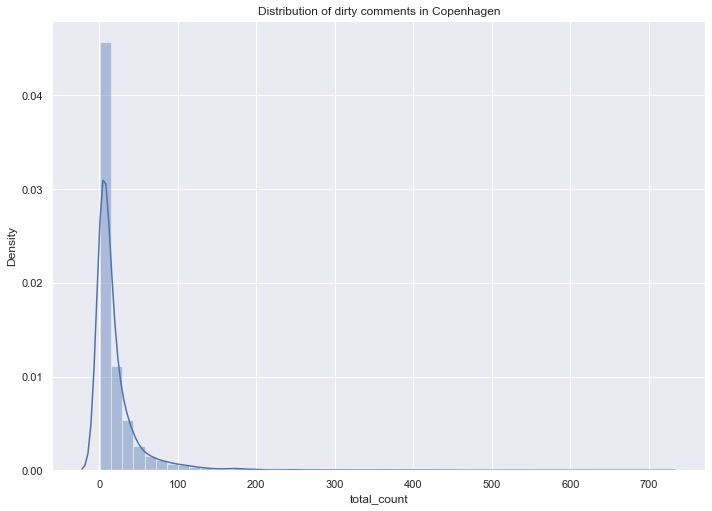

In [109]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dirty_comment['total_count'], kde=True,  kde_kws={'bw':0.2})
plt.title('Distribution of dirty comments in Copenhagen')
plt.show()

c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


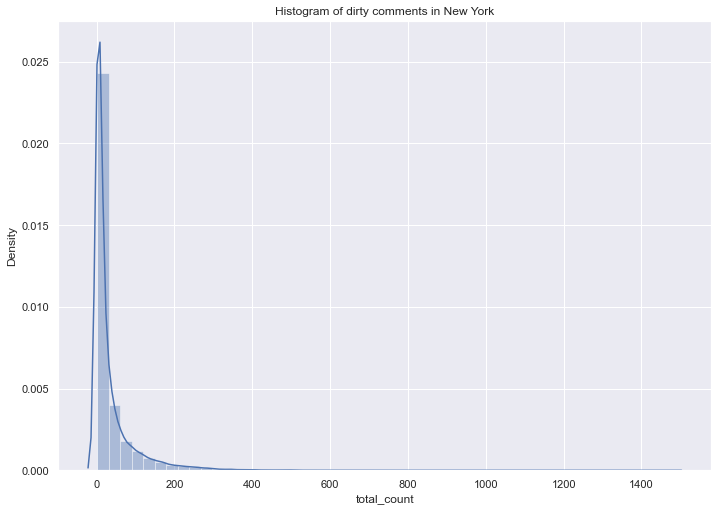

In [77]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dirty_comment_ny['total_count'], kde=True, bins=50)
plt.title('Histogram of dirty comments in New York')
plt.show()

## Section 3 - Prediction Challenge

## Binary classification

If we thinkg back to section 1 where we obtained not only the distribution of the price, but also obtained the percentiles for it we can start to think about how we can classify the price as either *high* or *low*. The idea is to set a low price to anything below or equal to the 66th percentile. Anything above will be considered high in the binary classification task.

In [78]:
data_binary = data.copy()
data_binary['price_label'] = data_binary['price'].apply(lambda x: 'High' if x > np.percentile(data.price, 66) else 'Low')

In [79]:
data_binary.last_review = pd.to_datetime(data_binary.last_review)
data_binary.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_label
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,2022-06-21,1.08,1,0,4,Low
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,2022-08-09,0.55,1,303,8,High
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2022-09-10,2.06,3,56,7,High
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,2022-08-04,0.16,1,59,2,Low
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022-08-22,0.13,1,0,2,High


Now that we have set the label in our data we can begin to create the model to classify our price data. We will be using **Logistic Regression** to classify our data.

In [80]:
y = data_binary['price_label']
data_X = pd.concat([data_binary, pd.get_dummies(data_binary['room_type'])],1)
X = data_X.drop(['price_label', 'name', 'room_type','host_name', 'id', 'host_id', 'neighbourhood', 'last_review', 'price'], axis=1)

C:\Users\guzma\AppData\Local\Temp\ipykernel_27912\1540878905.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data_X = pd.concat([data_binary, pd.get_dummies(data_binary['room_type'])],1)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.metrics import f1_score

model = LogisticRegression(C=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# f1 = f1_score(y_test, y_pred, labels=['High', 'Low'], average='binary', pos_label='Low') # Calculates the F1 score for our variable of either high or low

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'F1 Score: {f1}')

Accuracy: 0.7227985524728588
Confusion Matrix:
 [[ 326  933]
 [ 216 2670]]
Classification Report:
               precision    recall  f1-score   support

        High       0.60      0.26      0.36      1259
         Low       0.74      0.93      0.82      2886

    accuracy                           0.72      4145
   macro avg       0.67      0.59      0.59      4145
weighted avg       0.70      0.72      0.68      4145



c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The results above are self explanatory, although it might be a little bit hard to understand the true F1 score, therefore we are going to implement a snip of code from the lectures to better show the general f1 score.

In [82]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

precision = precision_score(y_test, y_pred, average=None, labels=['High','Low'])[1]
recall = recall_score(y_test, y_pred, average=None, labels=['High','Low'])[1]
f1 = 2 * precision * recall / (precision + recall)
print(f'F1 Score: {f1}')

F1 Score: 0.82293111419325


It looks great. We started with a goal to obtain a minimum of 0.6 on our f1 score but we have obtained a score greater than 0.8. By no means is this the best the model is capable of, but for now we will leave the score as is. Now we will visualize the confusion matrix show above in a better light to have an easier time understanding it.

c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


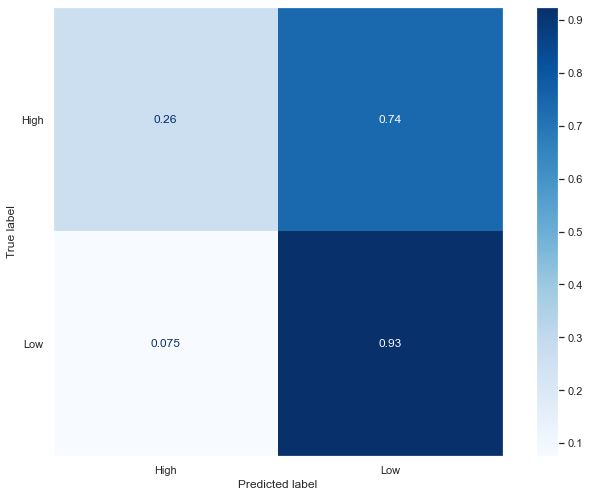

In [83]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.grid(False)

Now we can conclude that Logistic Regression to predict price is a great model and can accurately predict 80% of the time wheter the price is going to be high or low. We believe that implementing geographic data could be useful to further improve the model.

### Multi Class Classification

For working with multiple values in classification we are going to first implement a function that helps us classify wheter the price is high, which is any price above the 66th percentile in prices, a price that is low, defined as any price below the 33th percentile or, if the price is medium, defined as any price in between the 33th and 66th percentile.

In [84]:
def classify_price(price):
    if price > np.percentile(data.price, 66):
        return 'High'
    elif price < np.percentile(data.price, 33):
        return 'Low'
    else:
        return 'Medium'

In [85]:
data_multi = data.copy()
data_multi['price_label'] = data_multi['price'].apply(classify_price)

Now that we have defined our labels it's time we create our training and testing set for our classification model. We will utilize the same code as in the binary classification.

In [86]:
y = data_multi['price_label']
data_X = pd.concat([data_multi, pd.get_dummies(data_multi['room_type'])],1)
X = data_X.drop(['price_label', 'name', 'room_type','host_name', 'id', 'host_id', 'neighbourhood', 'last_review', 'price'], axis=1)

C:\Users\guzma\AppData\Local\Temp\ipykernel_27912\3827352903.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data_X = pd.concat([data_multi, pd.get_dummies(data_multi['room_type'])],1)


Now it's time to define our model. We believe that our model should be ... since it's useful for our current predicament and it can also be visualized in a nice way. We will start the implementation with the code below.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype('str'), test_size=0.3, random_state=42)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.4089264173703257
Confusion Matrix:
 [[631 232 396]
 [414 481 393]
 [632 383 583]]
Classification Report:
               precision    recall  f1-score   support

        High       0.38      0.50      0.43      1259
         Low       0.44      0.37      0.40      1288
      Medium       0.42      0.36      0.39      1598

    accuracy                           0.41      4145
   macro avg       0.41      0.41      0.41      4145
weighted avg       0.41      0.41      0.41      4145



In [98]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

precision = precision_score(y_test, y_pred, average=None, labels=['High','Medium','Low'])[1]
recall = recall_score(y_test, y_pred, average=None, labels=['High','Medium','Low'])[1]
f1 = 2 * precision * recall / (precision + recall)
print(f'F1 Score: {f1}')

F1 Score: 0.3925925925925926


c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


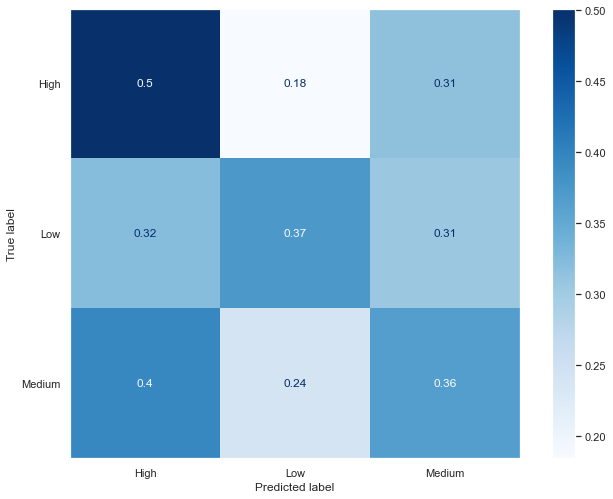

In [102]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.grid(False)

We can see that our model has a somewhat poor performance, this is due to us not normalizing our data before fitting it to our model, therefore we will now normalize our data to see how that improves our model's performance. For this we will use StandardScaler.

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Once our data has been normalized we will then fit our new model to it.

In [111]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [112]:
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.4919179734620024
Classification Report:
               precision    recall  f1-score   support

        High       0.44      0.57      0.50      1259
         Low       0.63      0.50      0.56      1288
      Medium       0.46      0.42      0.44      1598

    accuracy                           0.49      4145
   macro avg       0.51      0.50      0.50      4145
weighted avg       0.50      0.49      0.49      4145



In [113]:
precision = precision_score(y_test, y_pred, average=None, labels=['High','Medium','Low'])[1]
recall = recall_score(y_test, y_pred, average=None, labels=['High','Medium','Low'])[1]
f1 = 2 * precision * recall / (precision + recall)
print(f'F1 Score: {f1}')

F1 Score: 0.43762246897452645


c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


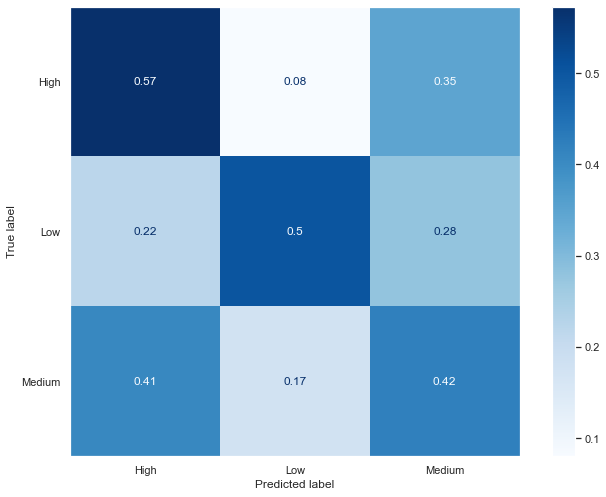

In [114]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.grid(False)

Seeing all of the metrics we can see that our model had some improvement, while not drastic enough, it did give us a bit more accuracy and increased our f1-score by around 4%.

In [122]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    precision = precision_score(y_test, pred_i, average=None, labels=['High','Medium','Low'])[1]
    recall = recall_score(y_test, pred_i, average=None, labels=['High','Medium','Low'])[1]
    f1 = 2 * precision * recall / (precision + recall)
    error.append(f1)

Text(0, 0.5, 'F1 Score')

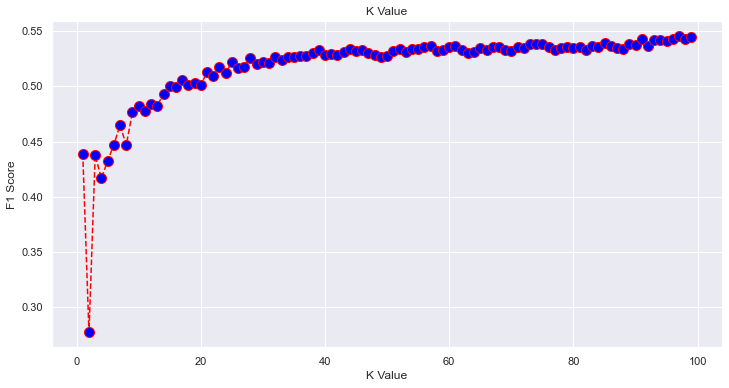

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

With the plot above we can find that if we increase our number of neighbors we can of course increase our f1-score to above 50%. We do this test up to 100 neighbors as we belive any more would be excessive. We can see that after around 20 neighbors the model flattens out at around 52%, but i can still increase to up to 55% in 100 neighbors.

## Section 4 - Conclusions